In this notebook we will be conducting some exploratory analysis. To begin, let us load the data set and packages we will be using.

In [1]:
%%capture
! pip install seaborn

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# loading data set
df = pd.read_csv('cleaned_automobil_df.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Now lets view the data types of each column in the data, to confirm they are in right formats before we begin. It is good to check the data types because it data types determine what kind of visualization method we need to use for each variable.

In [6]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


We can now calculate the correlation between the various int and float data types

In [7]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Now lets extract the correlation results for car price, horse power, fuel type and engine size to see how they are correlated.

In [13]:
corr_ = df.corr()
print(corr_[['price', 'horsepower', 'diesel', 'gas', 'engine-size']])

                      price  horsepower    diesel       gas  engine-size
symboling         -0.082391    0.075819 -0.196735  0.196735    -0.110581
normalized-losses  0.133999    0.217299 -0.101546  0.101546     0.112360
wheel-base         0.584642    0.371147  0.307237 -0.307237     0.572027
length             0.690628    0.579821  0.211187 -0.211187     0.685025
width              0.751265    0.615077  0.244356 -0.244356     0.729436
height             0.135486   -0.087027  0.281578 -0.281578     0.074694
curb-weight        0.834415    0.757976  0.221046 -0.221046     0.849072
engine-size        0.872335    0.822676  0.070779 -0.070779     1.000000
bore               0.543155    0.566936  0.054458 -0.054458     0.572609
stroke             0.082310    0.098462  0.241303 -0.241303     0.209523
compression-ratio  0.071107   -0.214514  0.985231 -0.985231     0.028889
horsepower         0.809575    1.000000 -0.169053  0.169053     0.822676
peak-rpm          -0.101616    0.107885 -0.475812  

The extracted results show that horsepower and engine size are highly correlated to the price of cars, indicated by coefficients 0.809575 (horsepower correlation) and 0.872335 for engine size, which makes sense.

In [16]:
cor_ = df[['price', 'horsepower', 'diesel', 'gas', 'engine-size']].corr()
cor_

,price,horsepower,diesel,gas,engine-size
price,1.000000,0.809575,0.110326,-0.110326,0.872335
horsepower,0.809575,1.000000,-0.169053,0.169053,0.822676
diesel,0.110326,-0.169053,1.000000,-1.000000,0.070779
gas,-0.110326,0.169053,-1.000000,1.000000,-0.070779
engine-size,0.872335,0.822676,0.070779,-0.070779,1.000000


In [20]:
#lets also find the correlation between the following columns: 
#bore, stroke,compression-ratio , and horsepower.
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


Now lets try to understand the (linear) relationship between some individual variables and the price. We can do this by using "regplot" method in seaborn library, which plots the scatterplot plus the fitted regression line for the data.

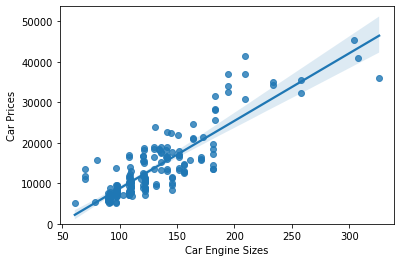

In [23]:
#first let's check the relationship between engine size and price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)
plt.xlabel('Car Engine Sizes')
plt.ylabel('Car Prices')
plt.show()

As we can see, as the engine-size goes up, the price goes up: indicating a **positive direct correlation** between price and engine size. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. We can confirm using correlation numbers below for price and engine size, which is **0.87**.

In [24]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Now lets check for some other variables in the dataset, which may have some potential to explain car prices

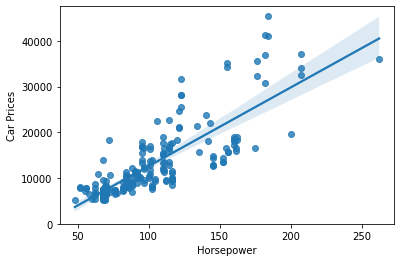

In [25]:
# now lets check for horsepower and price
sns.regplot(x='horsepower', y='price', data=df)
plt.ylim(0,)
plt.xlabel('Horsepower')
plt.ylabel('Car Prices')
plt.show()

It seems horsepower is also positively correlated to price, with a coefficient of **0.81**.

In [26]:
df[['horsepower', 'price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


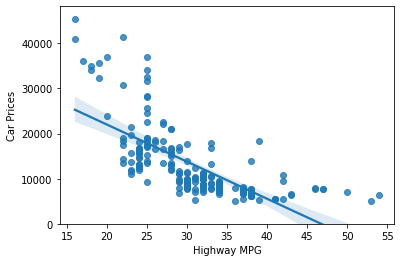

In [28]:
#now lets check for highway mpg and price
sns.regplot(x='highway-mpg', y='price', data= df)
plt.ylim(0,)
plt.xlabel('Highway MPG')
plt.ylabel('Car Prices')
plt.show()

It seems highway-mpg has a **negative correlation with price**, unlike horsepower and engine size. Although it appears to be highly correlated to price (**cooef = 0.70**).

In [29]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


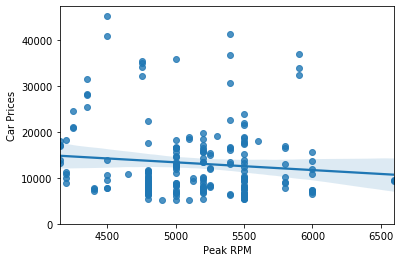

In [31]:
#now lets check for Peak-rpm and price
sns.regplot(x='peak-rpm', y='price', data= df)
plt.ylim(0,)
plt.xlabel('Peak RPM')
plt.ylabel('Car Prices')
plt.show()

In [32]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


This shows a weak correlation between Peak-rpm and price. The same applies to the **peak-rpm and price**.

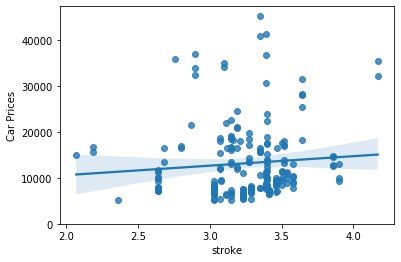

In [33]:
#now lets check for stroke and price
sns.regplot(x='stroke', y='price', data= df)
plt.ylim(0,)
plt.xlabel('stroke')
plt.ylabel('Car Prices')
plt.show()

In [34]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


#### Now, let's explore categorical variables in the data

Now lets look at the effects of some categorical variables such as body style within the data and their relation to price.
Note: Categorical variables are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

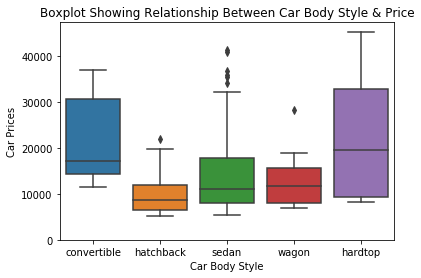

In [40]:
#lets create a boxplot to show the relationship
#between car body style and the price
sns.boxplot(x='body-style', y='price', data=df)
plt.ylim(0,)
plt.title('Boxplot Showing Relationship Between Car Body Style & Price')
plt.xlabel('Car Body Style')
plt.ylabel('Car Prices')
#plt.show()
plt.savefig('Boxplot1.png', dpi =200)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. In other words, there are incosistencies or wide variations of car prices irrespective of body style. E.g. the mean price of hardtop and convertible cars are almost close to 20,000 dollars. Let's examine "engine-location" and "price" and see how they will relate:

Text(0, 0.5, 'Car Prices')

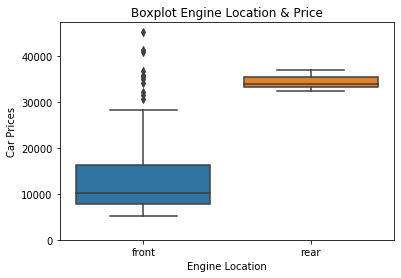

In [41]:
#lets check for engine-location
sns.boxplot(x='engine-location', y='price', data=df)
plt.ylim(0,)
plt.title('Boxplot Engine Location & Price')
plt.xlabel('Engine Location')
plt.ylabel('Car Prices')
#plt.show()
#plt.savefig('Boxplot1.png', dpi =200)

This result shows that car engine location has a potential to predict car prices. The  distribution of price between these two engine-location categories, front and rear, are distinct enough to make engine-location as a potential good predictor of price. What about the drive wheels? Let's check and see!

Text(0, 0.5, 'Car Prices - in Dollars')

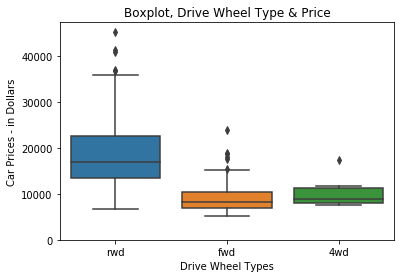

In [44]:
#lets check for drive wheel type
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.ylim(0,)
plt.title('Boxplot, Drive Wheel Type & Price')
plt.xlabel('Drive Wheel Types')
plt.ylabel('Car Prices - in Dollars')

The plot shows a reasonal distinction and distribution of price of cars between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price, just as the engine location.

#### Now, let us look at some Descriptive Statistical Analysis Approaches

First, lets use the simple .drecribe() method to show some descriptive results on the data df. Note that all str values and NaN values are skipped or ignored, as the describe() method by default works with numerical continuous variables. However, we can include other object data types using the 'include=' method.

In [46]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [47]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### Value Counts
We can also conduct some descriptive analysis using the value counts method in pandas.

In [49]:
# lets count the values of the various drive wheel types
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [51]:
#now lets convert it to a dataframe and save it in
# a variable called drive_wheels_counts, then we will
#rename the column fron 'drive-wheels' to value_counts

#coverting
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

#renaming column
drive_wheels_counts.rename(columns ={
    'drive-wheels': 'value_counts'}, inplace = True)

# now also rename the index column to drive_wheels
drive_wheels_counts.index.name = 'drive-wheels'

#lets see how it looks now
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Now lets repeat the same processes for the variable engine location as well.

In [52]:
#coverting
eng_loc_counts = df['engine-location'].value_counts().to_frame()

#renaming column
eng_loc_counts.rename(columns ={
    'engine-location': 'value_counts'}, inplace = True)

# now also rename the index column to drive_wheels
eng_loc_counts.index.name = 'engine-location'

#lets see how it looks now
eng_loc_counts

,value_counts
engine-location,
front,198
rear,3


Comparing the counts for drive wheel types and engine locations, we can see that engine location variable is not a good predictor of car prices because the distribution is skewed, as we have only 3 rear located engines, and the rest are all front located. However, wheel drive can predict price because, we have a reasonable distribution of fwd, rwd and 4wd, that is 118, 75, 8 counts respectively.

#### Now lets look at some grouping techniques and how we can use them do conduct descriptive analysis.

Taking drive wheels for instance, we can use the .unique() to see the different categories wheels in the data

In [53]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

This shows there 3 categories of drive wheel types in the data: rwd, fwd, and 4wd.

Now lets create a group (df_grp1) by selecting the columns 'drive wheels', 'body style', and 'price'.

In [55]:
df_grp1 = df[['drive-wheels', 'body-style', 'price']]
df_grp1

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


Now we can group df_grp1 'drive wheels' and calculate the mean.

In [57]:
df_grp1 =df_grp1.groupby(['drive-wheels'],as_index=False).mean()
df_grp1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From df_grp1, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

The above grouping was done for only one variable (wheel type). But we can also group and test for multiple variables. Intially, we had created a group, df_grp1 with three variables (drive wheel type, body style and price). 

Now let's recreate this group but name is df_grp2, and do the group test for drive wheel type and body style variables, in relation to price.

In [58]:
df_grp2 = df[['drive-wheels', 'body-style', 'price']]

In [59]:
#now lets group and calculate mean.
df_grp2 =df_grp2.groupby(
    ['drive-wheels', 'body-style'],as_index=False).mean()
df_grp2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


The table shows the mean prices of the grouped values of drive wheels and body style. 

Although we can read through the table (dataframe) to do the comparison and detect the relationships, we can use a pivot table to make the reading easier.

We will convert the dataframe to a pivot table using the method "pivot " and create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [60]:
df_grp2_pivot = df_grp2.pivot(index='drive-wheels', columns='body-style')
df_grp2_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

What if we maintain body style as index and drive wheels as columns? Lets check and see.

In [62]:
df_grp3_pivot = df_grp2.pivot(index='body-style', columns='drive-wheels')
df_grp3_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

 We can see that there no differences in the results, except for the switching of the rows and column values and labels, as expected.

As we can see from the two pivot tables, there are times we won't have data for some of the pivot cells (NaN). We can fill these missing cells with the value 0, although any other value could potentially be used as well. Note that, missing data is a complex subject on its own, to be studied.

We can deal with the NaN entries by replacing them with (0), using the .fillna() method.

In [63]:
df_grp2_pivot = df_grp2_pivot.fillna(0) #set NaN = 0
df_grp2_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Another insight from the pivot tables is that **sedan, hardtop, and convertible cars** that are **rwd** drive wheel types are the most expensive cars. 

Now let's try and calculate the mean price by grouping by only body style of cars.

In [69]:
#grouping results
df_grp3 = df[['body-style', 'price']]

#grouping by and calculating mean of price
df_grp3_bodystyle = df_grp3.groupby(['body-style'], as_index =False).mean()
df_grp3_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### Heat Maps


We can use heat maps to visualize the relationship between variables as well.

Now lets use a heat map to view the relationship between car body style and average price.

Let's use the __df_grp2_pivot__ table.

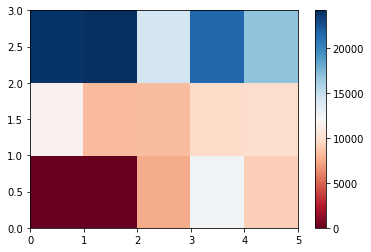

In [70]:
#using matplotlib
plt.pcolor(df_grp2_pivot, cmap = 'RdBu')
plt.colorbar() #to show the color bar
plt.show()

The default labels convey no useful information to us. Let's change that:

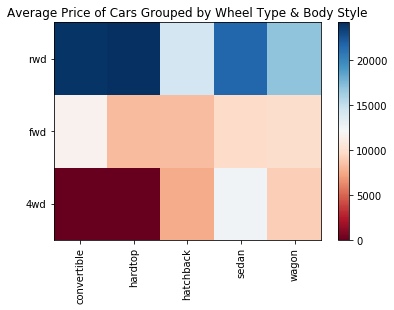

In [74]:
fig, ax = plt.subplots()
im = ax.pcolor(df_grp2_pivot, cmap='RdBu')

#label names
row_labels = df_grp2_pivot.columns.levels[1]
col_labels = df_grp2_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_grp2_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_grp2_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.title('Average Price of Cars Grouped by Wheel Type & Body Style')
#plt.show()
plt.savefig('heatmap.png')

#### Correlations and Causation

The main question we want to answer with the cars dataset, is "What are the main characteristics which have the most impact on the car price?"

We will use the pearson correlation method to evaluate the various car-features and deduce which ones have the most impact of price of cars.

In [75]:
# lets use the corr() function to view correlation of all variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


To test the significance of the correlation between variables, there is the need to calculate the significance levels (p-values). 

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

 We will obtain this information using  "stats" module in the "scipy"  library. So lets begin by importing the scipy library.

In [77]:
from scipy import stats

To evaluate each variable that could impact the price of cars, we will calculate the pearson values for each variable that had some level of correlation with price in the correlation result above.

**Wheel Base Variable Vs Price**


First we will calculate the pearson scores for the wheel base variable as follows:

In [86]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.584641822265508  with a P-value of P =  8.076488270733218e-20


<h5>Conclusion:</h5>

From the results, since the p-value is < 0.001 (~ 8.076488270733218e-20), it shows that the correlation between wheel base and car price is statistically significant, although the linear regression or correlation coefficient is not so strong (~ 0.585)

**Horsepower Vs Price**

Let's calculate for impact of horsepower on price.

In [87]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


<h5>Conclusion:</h5>

<p>The p-value is $<$ 0.001 (i.e. 6.369057428259557e-48), the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~ 0.809, which is close to 1)</p>

**Length vs Price**

Now let's calculate for length of car and its impact on price.

In [88]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, although the linear relationship is not quite strong (~0.691)</p>

**Width Vs Price**

Let's calculate pearson correlation for car width and the price.

In [89]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.7512653440522675  with a P-value of P =  9.200335510481123e-38


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751, which is quite close to 1)</p>

**Curb-Weight Vs Price**

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [90]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.8344145257702844  with a P-value of P =  2.189577238893878e-53


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834, which is closer to 1).</p>

**Engine-size Vs Price**

let's calculate the pearson correlation coeff and p-values for engine size and price of car.

In [91]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.8723351674455185  with a P-value of P =  9.265491622198389e-64


<h5>Conclusion:</h5>

<p>The p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is quite strong (~0.872, which is very much closer to 1). </p>

**Bore Vs Price**

Let's calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [92]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is 0.5431553832626602  with a P-value of P =  8.049189483935489e-17


<h5>Conclusion:</h5>

<p>The p-value is $<$ 0.001, which means the correlation between bore and price is statistically significant, although the linear relationship is not very strong, it is just moderate (~0.543). </p>

Finally, let us do the same calculation for city-mpg and highway mpg.

**City-mpg Vs Price**



In [93]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the linear relationship is quite strong (~ -0.687). The negative coefficient shows that the relationship is negative.</p>

**Highway-mpg Vs Price**

In [94]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Corr Coef is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Corr Coef is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~ -0.705, which is quite close to -1 or moderately strong).</p>

**ANOVA Analysis**

Note: The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

For our data, we wanted to find out the relationship between various car features and its price, i.e. how car features can help predict car prices. 

By calculating the ANOVA tests (F-test and p-values), if the price variable is strongly correlated with the variable (feature) we are analyzing, expect ANOVA to **return a sizeable F-test score and a small p-value**.

Now lets dive in and see!

In [102]:
#first we will look at 'Drive wheels'

df_grp_test = df[['drive-wheels', 'body-style', 'price']]
grouped_test = df_grp_test[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [103]:
df_grp_test

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


We can calculate the values of the group method using the 'get_group' method.


In [104]:
grouped_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

Let's calculate the ANOVA using the f_oneway() method

In [105]:
f_val, p_val = stats.f_oneway(grouped_test.get_group(
    'fwd')['price'], grouped_test.get_group(
    'rwd')['price'], grouped_test.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. 

However, does this mean all three tested groups are all this highly correlated? Let's find out by calculating ANOVA separately.

**Let's examine for fwd and rwd separately**

In [106]:
f_val, p_val = stats.f_oneway(grouped_test.get_group(
    'fwd')['price'], grouped_test.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


**Lets examine 4wd and rwd**

In [107]:
f_val, p_val = stats.f_oneway(grouped_test.get_group(
    '4wd')['price'], grouped_test.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


**Let's examine 4wd and fwd**

In [108]:
f_val, p_val = stats.f_oneway(grouped_test.get_group(
    '4wd')['price'], grouped_test.get_group('fwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


The separate calculations show that only fwd and rwd produced F-score that is very large and a p-value almost 0, indicating an almost certain statistical significance than the rest of the drive wheel types.

<h3>Conclusion: The Important Variables Identified</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>
</p>